# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 70270.64 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 95338.78 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 116132.15 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 130578.43 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 139568.04 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 146168.43 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 76114.11 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 110541.43 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 128134.56 examples/s]

Filter (num_proc=6):  65%|██████▌   | 73061/112120 [00:00<00:00, 124063.10 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 157153.51 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.56 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 38.18 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.56 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 50.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.64 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.68 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.71 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.45 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.01 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.88 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.78 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.37 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.69 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.87 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.42 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.57 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.50 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.87 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.55 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.85 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.89 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.13 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 47.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.44 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.80 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.07 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.79 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.62 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.14 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 33.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.07 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 42.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 44.62 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 44.39 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.21 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.08 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.87 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.03 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.29 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.83 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.47 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.12 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.02 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.59 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.60 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.97 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.73 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.68 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.95 examples/s]

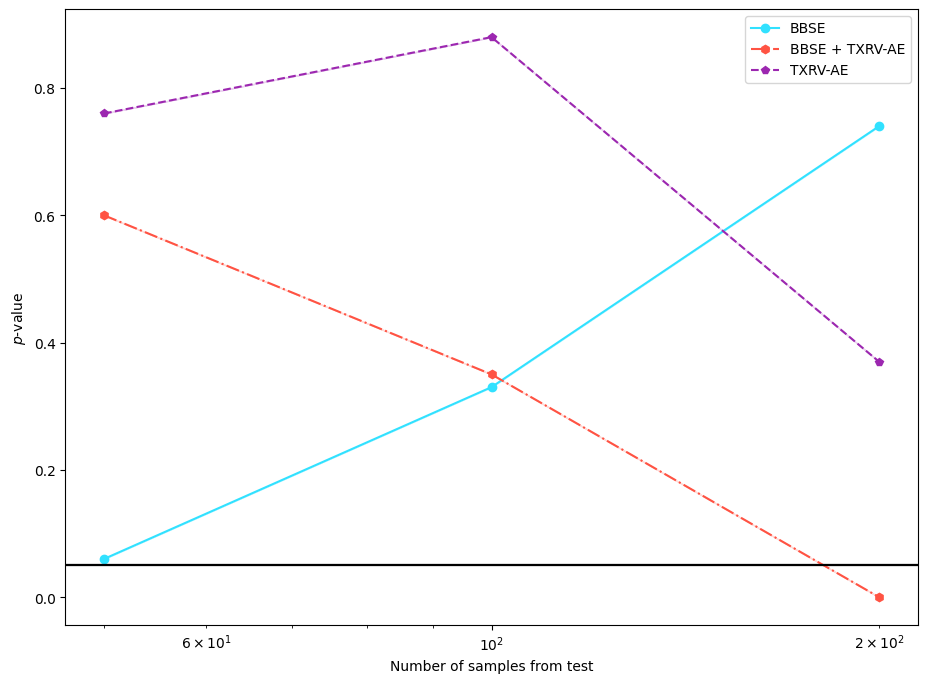

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.32 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.00 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.66 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.36 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.37 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.00 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.57 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.34 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.85 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.24 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.69 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.36 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.40 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.36 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.04 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.40 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.14 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.87 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.61 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.24 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.07 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.65 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.62 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.83 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.24 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.79 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.64 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.63 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.54 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.24 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.66 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.50 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.11 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.50 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.05 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.18 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.51 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.43 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.81 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.43 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.19 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.26 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.91 examples/s]

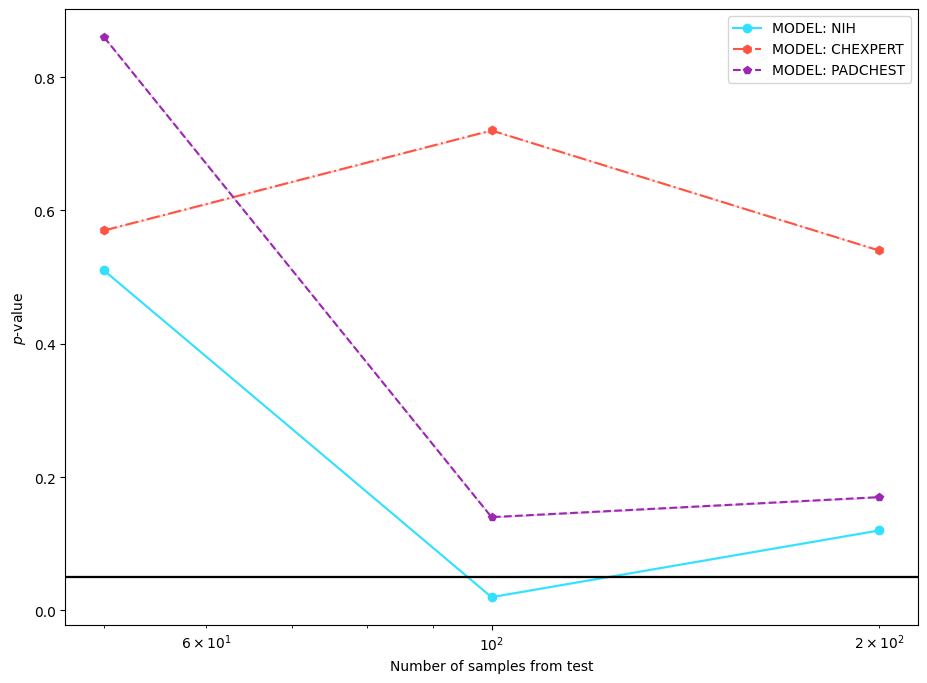

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57732.62 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82292.40 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 95606.66 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 103158.11 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 110514.62 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 113843.31 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56379.34 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 81550.61 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93950.06 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98031.24 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 108850.78 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 113468.57 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.96 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.39 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.18 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.39 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.35 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.04 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.95 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.66 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.69 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.12 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.00 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.88 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.59 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.22 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.70 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.94 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.35 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.06 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53457.79 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77647.66 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88312.48 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 93695.41 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101704.96 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 106918.41 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48631.66 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73983.91 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 89065.36 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98251.00 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 103724.59 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108260.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.10 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.74 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.85 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.04 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.43 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.35 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.92 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.85 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.84 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.33 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.41 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.14 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.06 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53634.99 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77746.60 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91967.37 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100145.11 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 105368.59 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109297.54 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52022.46 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76658.48 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 90547.67 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99740.57 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 105008.96 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109487.22 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.82 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.24 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.23 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.81 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.89 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.93 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.38 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.75 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.96 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.39 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.19 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53318.44 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74070.45 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84455.78 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96760.35 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 107985.98 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 122772.86 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48750.35 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68844.72 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84069.71 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94014.69 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 108016.11 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 120632.87 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.16 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.67 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.28 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.09 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.17 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.99 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.11 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.30 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.79 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.27 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.29 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.33 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.98 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.35 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.67 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.90 examples/s]

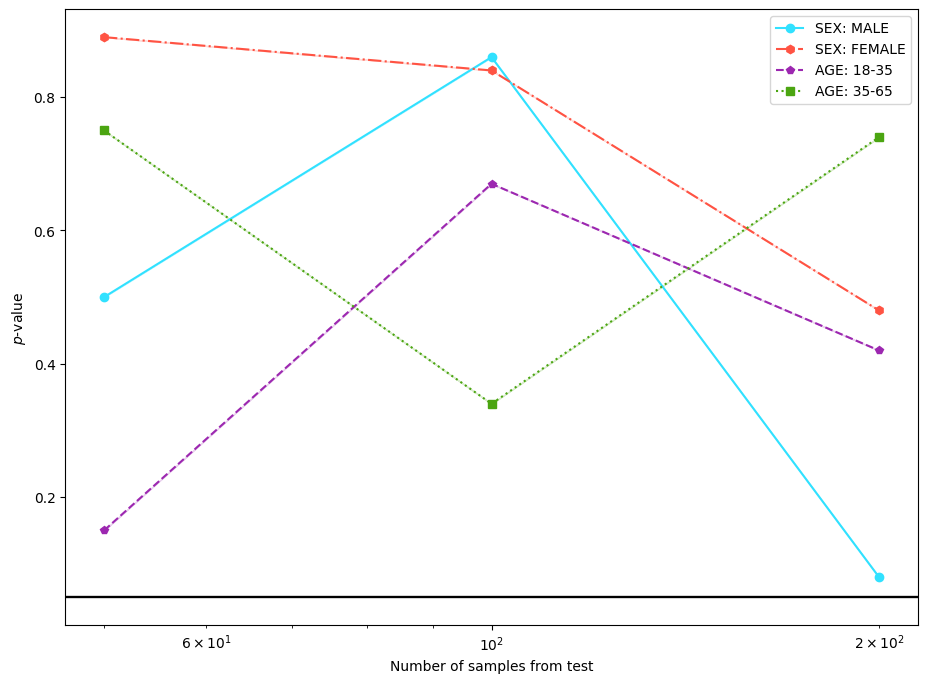

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.13 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.68 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.57 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.27 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.08 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.65 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.34 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.06 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.16 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.10 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.37 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.68 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.17 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.02 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.17 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.47 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.98 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.22 examples/s]

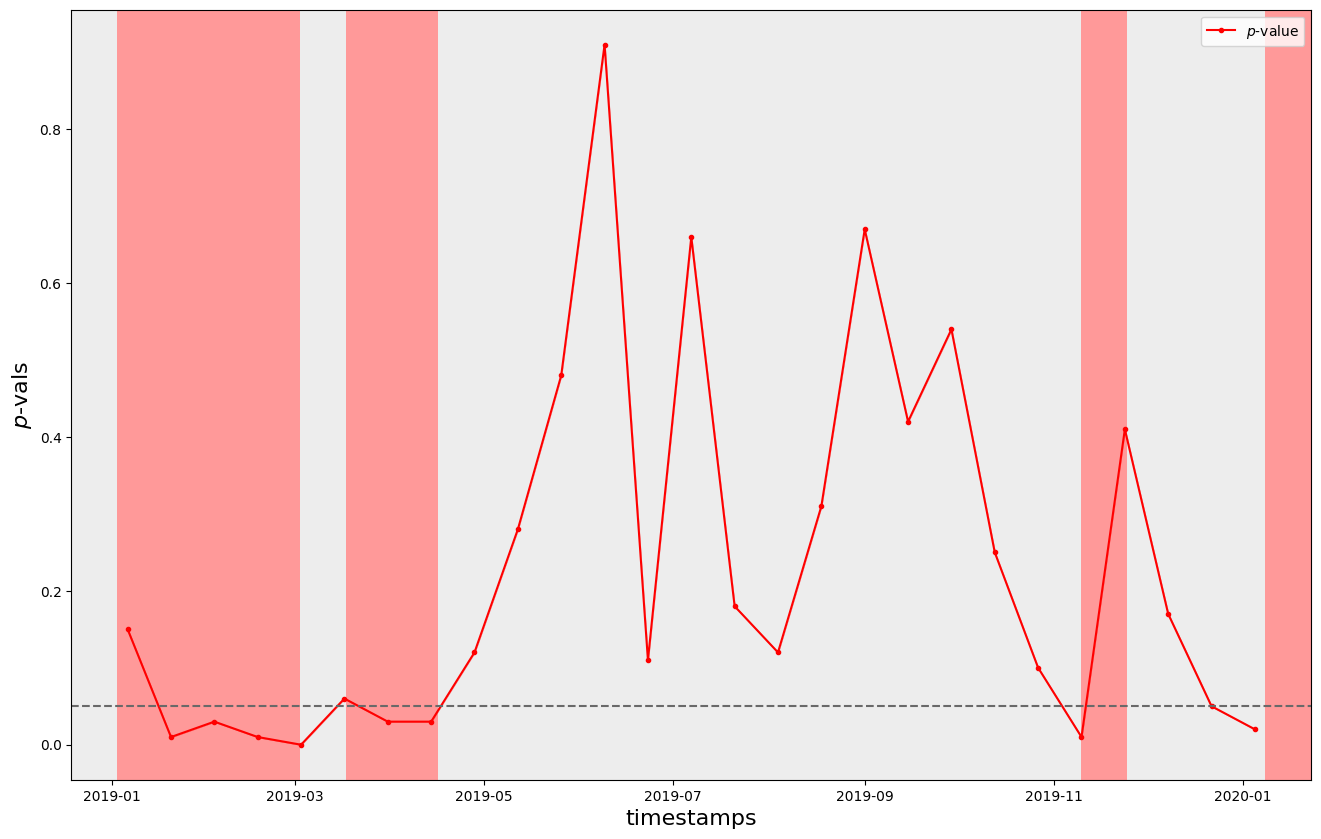

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)